In [77]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [78]:
import sys
import os

py_file_location = "/content/gdrive/My Drive/Onera"
sys.path.append(os.path.abspath(py_file_location))

In [79]:
cd ./gdrive/My Drive/Onera

[Errno 2] No such file or directory: './gdrive/My Drive/Onera'
/content/gdrive/My Drive/Onera


In [80]:
pwd

'/content/gdrive/My Drive/Onera'

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os
from PIL import Image
import os
import time
import cv2
from skimage import segmentation
import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
import imageio

In [82]:
train_folder = "./Onera Satellite Change Detection dataset - Train Labels/"
test_folder = "./Onera Satellite Change Detection dataset - Test Labels/"
images_folder = "./Onera Satellite Change Detection dataset - Images/"

In [84]:
def getCities(folder):
    return [name for name in os.listdir(folder)
            if os.path.isdir(os.path.join(folder, name))]


def getData(folder):
    images = list()
    images_grayscale = list()
    src = list()
    cities = getCities(folder);
    for city in cities:
        img1 = images_folder + "/" + city + "/pair/img1.png"
        img2 = images_folder + "/" + city + "/pair/img2.png"
        gt = folder + "/" + city + "/cm/cm.png"
        src.append([img1, img2, gt])
        image1, image2, image3 = cv2.imread(img1), cv2.imread(img2), cv2.imread(gt)
        rgb1,rgb2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB),cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        gray1,gray2,gray3 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY),cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY),cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
        images.append(np.array([rgb1,rgb2,image3]))
        images_grayscale.append(np.array([gray1,gray2,gray3]))
    return src, images,images_grayscale

In [85]:
train_data_src, train_data,train_data_grayscale = getData(train_folder)
test_data_src, test_data,test_data_grayscale = getData(test_folder)

In [86]:
def printData(images,source):
    for city_data,src in zip(images,source):
        fig,ax = plt.subplots(1,3,figsize=(15,15))
        city = src[0].split('/')[-3]
        plt.title(city)
        ax[0].imshow(city_data[0])
        ax[1].imshow(city_data[1])
        ax[2].imshow(city_data[2])

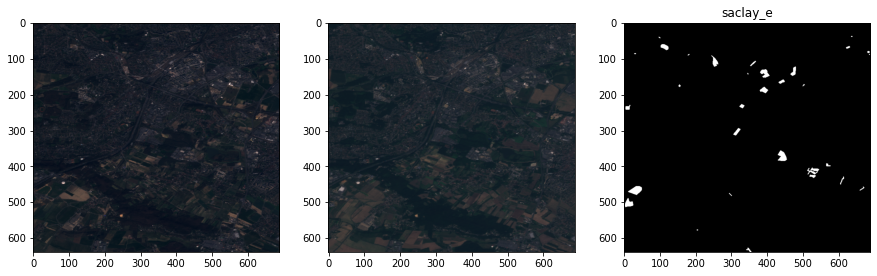

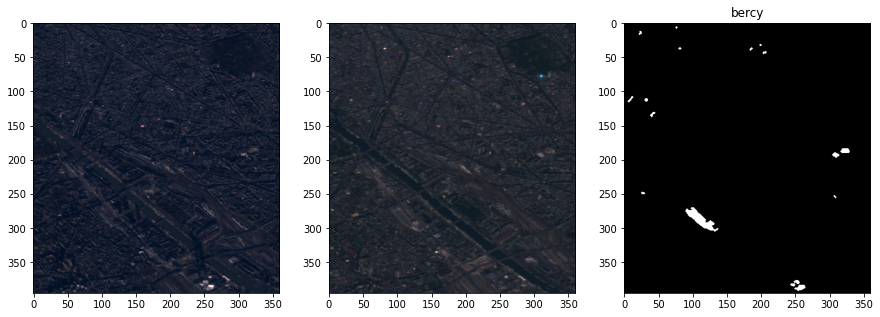

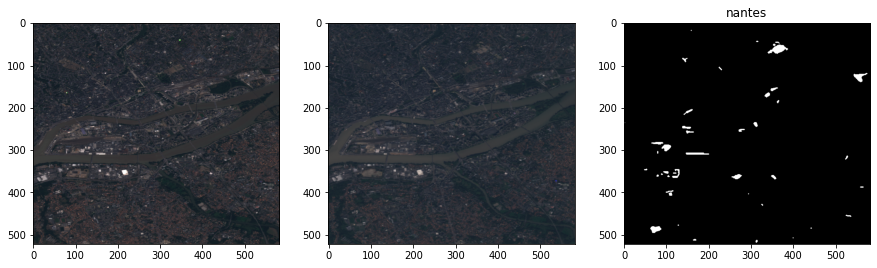

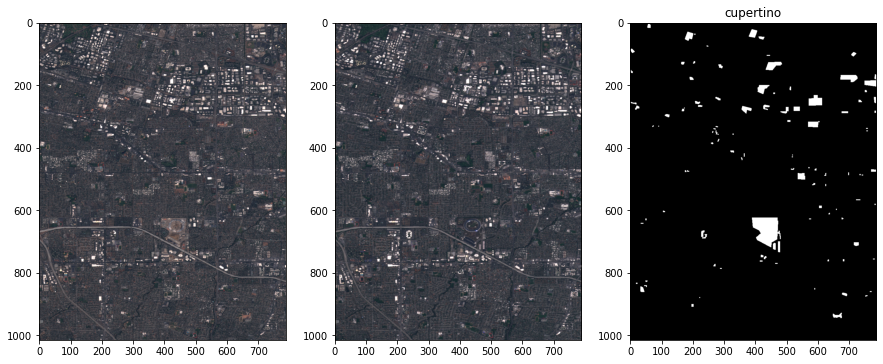

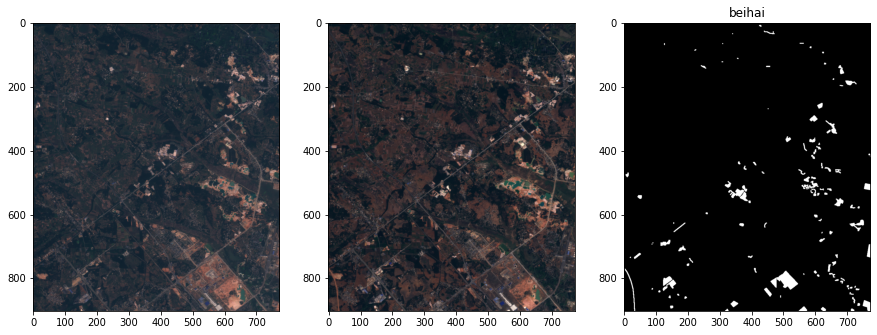

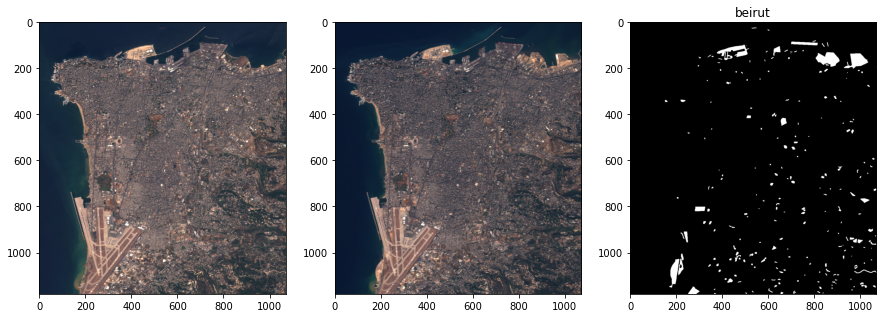

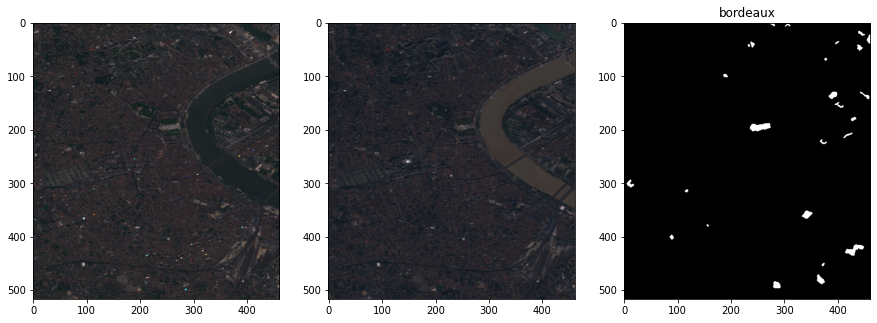

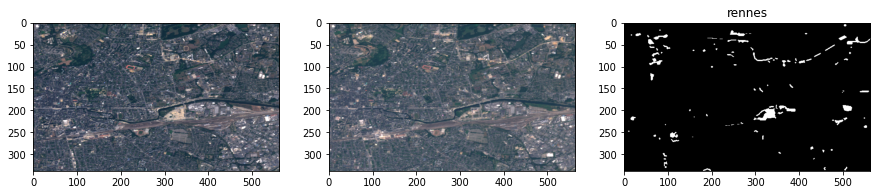

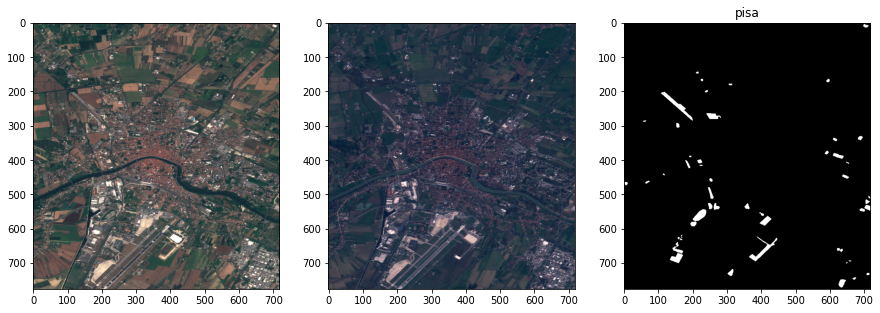

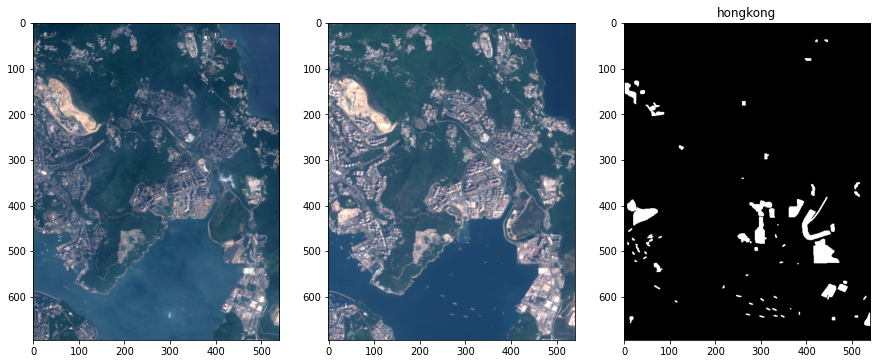

In [87]:
printData(train_data[0:10],train_data_src[0:10])

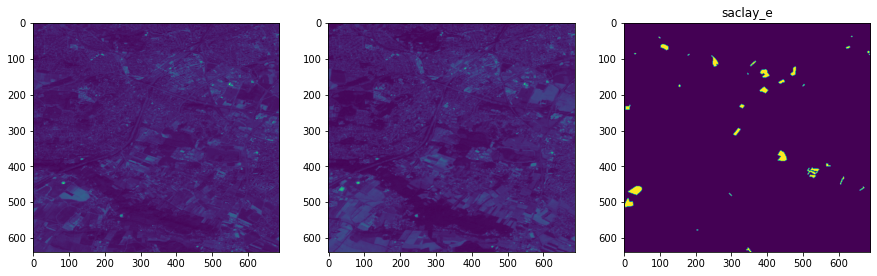

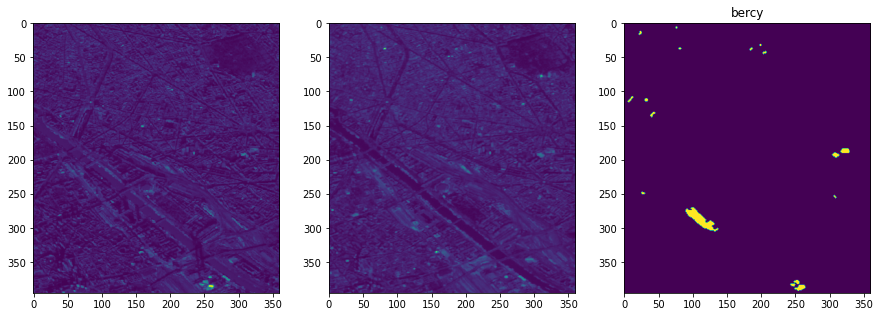

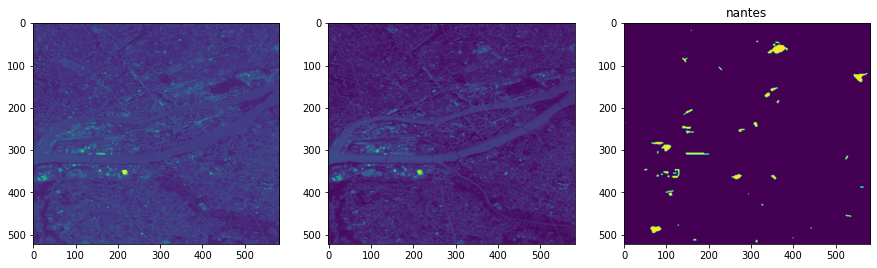

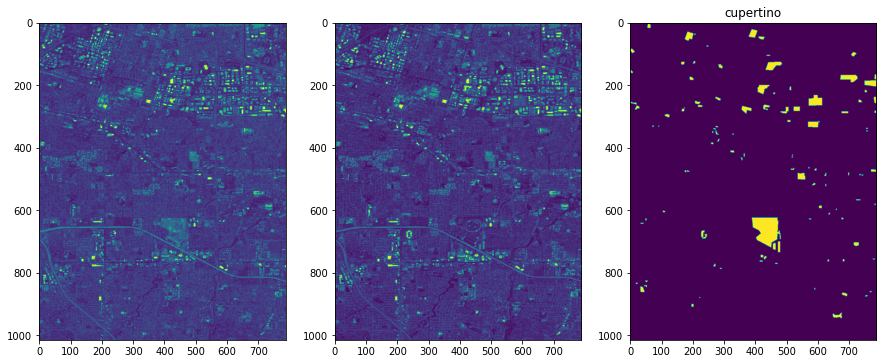

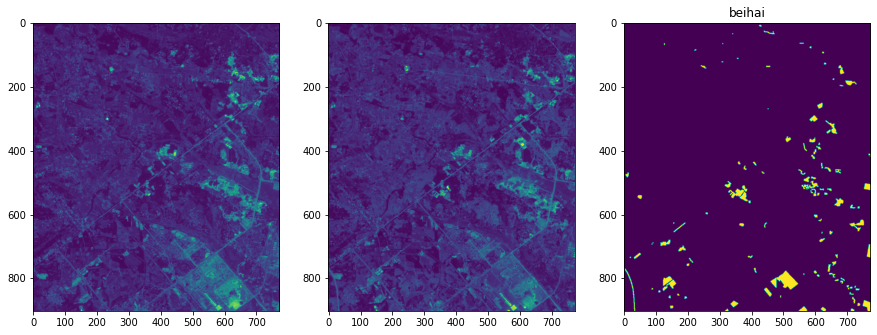

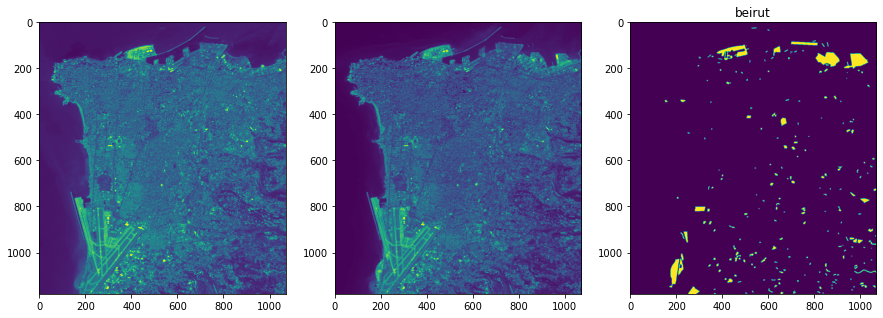

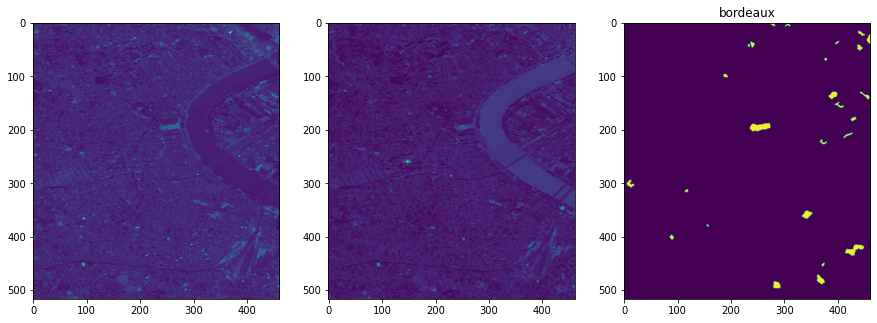

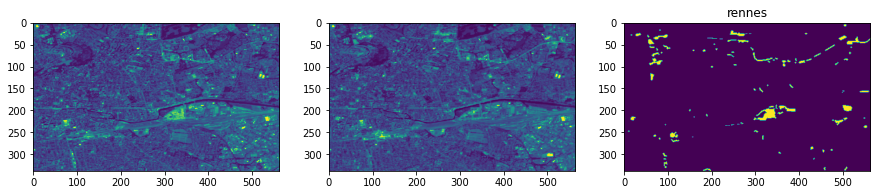

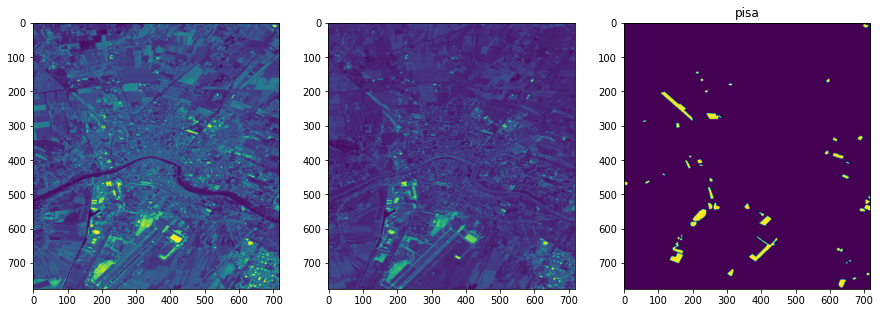

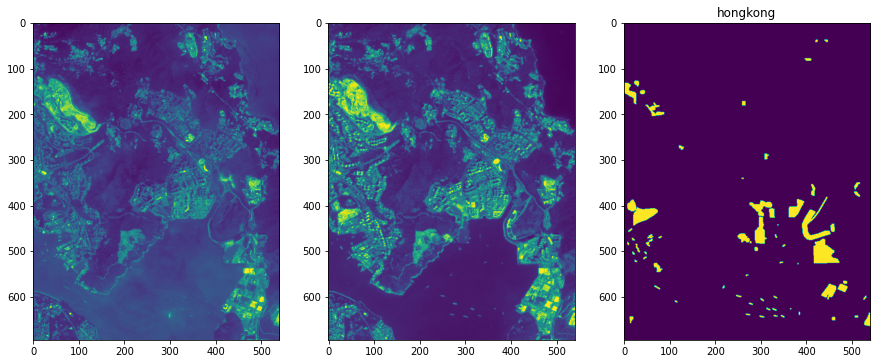

In [88]:
printData(train_data_grayscale[0:10],train_data_src[0:10])

In [89]:
# def segment(img):
#     class Args(object):
#         input_image_path = r'./Onera Satellite Change Detection dataset - Images/abudhabi/pair/img1.png'  # image/coral.jpg image/tiger.jpg
#         train_epoch = 2 ** 6
#         mod_dim1 = 64  #
#         mod_dim2 = 32
#         gpu_id = 0

#         min_label_num = 4  # if the label number small than it, break loop
#         max_label_num = 256  # if the label number small than it, start to show result image.


#     class MyNet(nn.Module):
#         def __init__(self, inp_dim, mod_dim1, mod_dim2):
#             super(MyNet, self).__init__()

#             self.seq = nn.Sequential(
#                 nn.Conv2d(inp_dim, mod_dim1, kernel_size=3, stride=1, padding=1),
#                 nn.BatchNorm2d(mod_dim1),
#                 nn.ReLU(inplace=True),

#                 nn.Conv2d(mod_dim1, mod_dim2, kernel_size=1, stride=1, padding=0),
#                 nn.BatchNorm2d(mod_dim2),
#                 nn.ReLU(inplace=True),

#                 nn.Conv2d(mod_dim2, mod_dim1, kernel_size=3, stride=1, padding=1),
#                 nn.BatchNorm2d(mod_dim1),
#                 nn.ReLU(inplace=True),

#                 nn.Conv2d(mod_dim1, mod_dim2, kernel_size=1, stride=1, padding=0),
#                 nn.BatchNorm2d(mod_dim2),
#             )

#         def forward(self, x):
#             return self.seq(x)


#     def run():
#         start_time0 = time.time()

#         args = Args()
#         args.input_image_path = img
#         torch.cuda.manual_seed_all(1943)
#         np.random.seed(1943)
#         os.environ['CUDA_VISIBLE_DEVICES'] = str(args.gpu_id)  # choose GPU:0
#         image = cv2.imread(args.input_image_path)

#         '''segmentation ML'''
#         seg_map = segmentation.felzenszwalb(image, scale=32, sigma=0.5, min_size=64)
#         # seg_map = segmentation.slic(image, n_segments=10000, compactness=100)
#         seg_map = seg_map.flatten()
#         seg_lab = [np.where(seg_map == u_label)[0]
#                    for u_label in np.unique(seg_map)]

#         '''train init'''
#         device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

#         tensor = image.transpose((2, 0, 1))
#         tensor = tensor.astype(np.float32) / 255.0
#         tensor = tensor[np.newaxis, :, :, :]
#         tensor = torch.from_numpy(tensor).to(device)

#         model = MyNet(inp_dim=3, mod_dim1=args.mod_dim1, mod_dim2=args.mod_dim2).to(device)
#         criterion = torch.nn.CrossEntropyLoss()
#         optimizer = torch.optim.SGD(model.parameters(), lr=5e-2, momentum=0.9)
#         # optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-1, momentum=0.0)

#         image_flatten = image.reshape((-1, 3))
#         color_avg = np.random.randint(255, size=(args.max_label_num, 3))
#         show = image

#         '''train loop'''
#         start_time1 = time.time()
#         model.train()
#         for batch_idx in range(args.train_epoch):
#             '''forward'''
#             optimizer.zero_grad()
#             output = model(tensor)[0]
#             output = output.permute(1, 2, 0).view(-1, args.mod_dim2)
#             target = torch.argmax(output, 1)
#             im_target = target.data.cpu().numpy()

#             '''refine'''
#             for inds in seg_lab:
#                 u_labels, hist = np.unique(im_target[inds], return_counts=True)
#                 im_target[inds] = u_labels[np.argmax(hist)]

#             '''backward'''
#             target = torch.from_numpy(im_target)
#             target = target.to(device)
#             loss = criterion(output, target)
#             loss.backward()
#             optimizer.step()

#             '''show image'''
#             un_label, lab_inverse = np.unique(im_target, return_inverse=True, )
#             if un_label.shape[0] < args.max_label_num:  # update show
#                 img_flatten = image_flatten.copy()
#                 if len(color_avg) != un_label.shape[0]:
#                     color_avg = [np.mean(img_flatten[im_target == label], axis=0, dtype=np.int) for label in un_label]
#                 for lab_id, color in enumerate(color_avg):
#                     img_flatten[lab_inverse == lab_id] = color
#                 show = img_flatten.reshape(image.shape)

#                 return show
#             if len(un_label) < args.min_label_num:
#                 break

#         '''save'''
#         time0 = time.time() - start_time0
#         time1 = time.time() - start_time1
#         cv2.imwrite("seg_%s_%ds.jpg" % (args.input_image_path[6:-4], time1), show)

#     return run()

In [90]:
print(train_data[0][0].shape,train_data[0][1].shape,train_data[0][2].shape)

(639, 688, 3) (639, 688, 3) (639, 688, 3)


In [91]:
print(train_data_grayscale[0][0].shape,train_data_grayscale[0][1].shape,train_data_grayscale[0][2].shape)

(639, 688) (639, 688) (639, 688)


In [92]:
def generate_data(train_data,train_data_grayscale):
  train_x_rgb,test_x_rgb,train_y_rgb,test_y_rgb = [list() for i in range(4)]
  train_x_gray,train_y_gray,test_x_gray,test_y_gray = [list() for i in range(4)]
  for images in zip(train_data,train_data_grayscale):
    rgb_list, gray_list = images
    rgb_proc, gray_proc = [],[]
    for img_rgb,img_gray in zip(rgb_list,gray_list):
      img_rgb_proc = tf.image.resize(img_rgb/255, (112, 112), method='nearest')
      img_gray_proc = tf.image.resize(np.atleast_3d(img_gray)/255, (112, 112), method='nearest')
      rgb_proc.append(img_rgb_proc)
      gray_proc.append(img_gray_proc)
    pre_rgb, post_rgb,gt_rgb = rgb_proc
    pre_gray,post_gray,gt_gray = gray_proc
    rgb_x = tf.concat([pre_rgb,post_rgb],axis=-1)
    gray_x = tf.concat([pre_gray,post_gray],axis=-1)
    train_x_rgb.append(rgb_x)
    train_y_rgb.append(gt_rgb)
    train_x_gray.append(gray_x)
    train_y_gray.append(gt_gray)
  return np.array(train_x_rgb),np.array(train_y_rgb),np.array(train_x_gray),np.array(train_y_gray)

In [93]:
train_x_rgb,train_y_rgb,train_x_gray,train_y_gray = generate_data(train_data,train_data_grayscale)
test_x_rgb, test_y_rgb,test_x_gray,test_y_gray = generate_data(test_data,test_data_grayscale)

In [94]:
print(train_x_rgb.shape,train_y_rgb.shape,train_x_gray.shape,train_y_gray.shape)
print(test_x_rgb.shape,test_y_rgb.shape,test_x_gray.shape,test_y_gray.shape)

(14, 112, 112, 6) (14, 112, 112, 3) (14, 112, 112, 2) (14, 112, 112, 1)
(10, 112, 112, 6) (10, 112, 112, 3) (10, 112, 112, 2) (10, 112, 112, 1)


In [95]:
print(train_x_rgb[0])
print(train_x_gray[0])
print(train_y_rgb[0])
print(train_y_gray[0])

[[[0.04313725 0.06666667 0.11372549 0.05490196 0.10588235 0.14117647]
  [0.07058824 0.08235294 0.12156863 0.05098039 0.10980392 0.14117647]
  [0.0627451  0.08627451 0.12156863 0.05098039 0.10588235 0.14117647]
  ...
  [0.07058824 0.09411765 0.14117647 0.10980392 0.14117647 0.17254902]
  [0.20784314 0.19215686 0.22745098 0.19215686 0.2        0.22352941]
  [0.15294118 0.13333333 0.16470588 0.14117647 0.16470588 0.19215686]]

 [[0.09411765 0.09411765 0.1372549  0.05098039 0.10980392 0.14117647]
  [0.11372549 0.10588235 0.1372549  0.05098039 0.11372549 0.14509804]
  [0.06666667 0.08627451 0.1254902  0.05098039 0.10588235 0.14117647]
  ...
  [0.09803922 0.13333333 0.15686275 0.1254902  0.15294118 0.18823529]
  [0.10980392 0.12156863 0.16078431 0.1372549  0.16862745 0.19607843]
  [0.07843137 0.10980392 0.14117647 0.10980392 0.15294118 0.17647059]]

 [[0.09803922 0.12941176 0.15686275 0.11764706 0.16078431 0.18039216]
  [0.09411765 0.09803922 0.1372549  0.05490196 0.11372549 0.14509804]
  [0

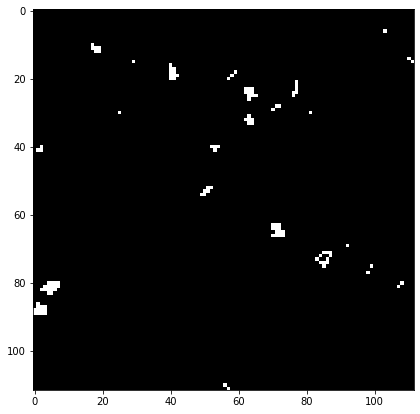

In [96]:
plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(train_y_rgb[0])

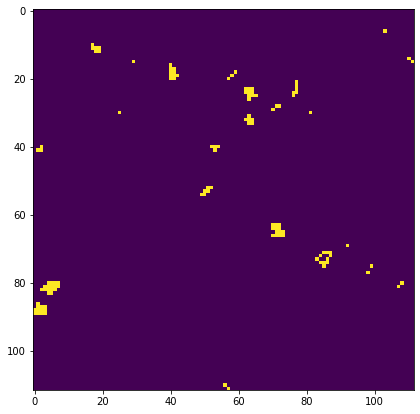

In [97]:
plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(train_y_gray[0][:,:,0])

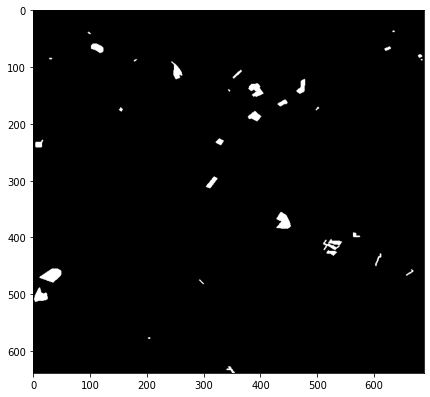

In [98]:
plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(train_data[0][2])

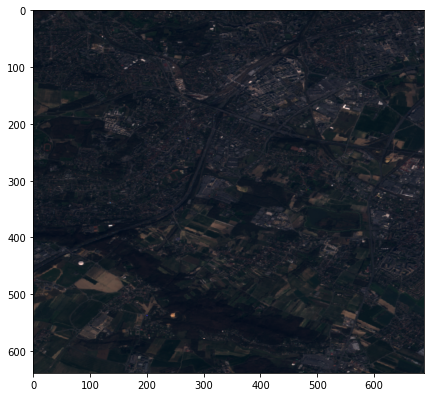

In [99]:
plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(train_data[0][0])

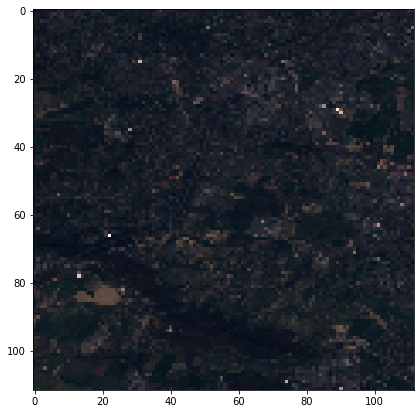

In [100]:
plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(train_x_rgb[0][:,:,0:3])

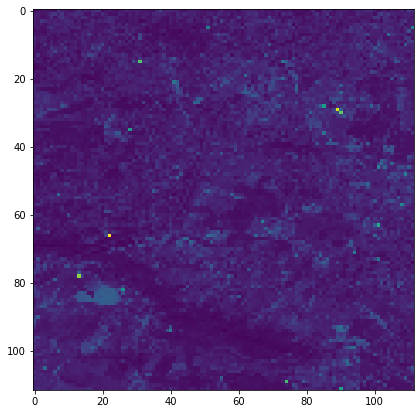

In [101]:
plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(train_x_gray[0][:,:,0])

In [102]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
   
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(inputs)
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(conv)
    
    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
         
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

In [103]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):

    up = Conv2DTranspose(
                 n_filters,    
                 3,   
                 strides=(2,2),
                 padding='same')(expansive_input)

    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(merge)
    conv = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(conv)
    return conv

In [104]:
def unet_model(input_size=(112, 112, 2), n_filters=16, n_classes=2):
    inputs = Input(input_size)
    cblock1 = conv_block(inputs, n_filters)
    cblock2 = conv_block(cblock1[0], 2*n_filters)
    cblock3 = conv_block(cblock2[0], 4*n_filters)
    cblock4 = conv_block(cblock3[0], 8*n_filters, dropout_prob=0.3)
    cblock5 = conv_block(cblock4[0], 16*n_filters, dropout_prob=0.3, max_pooling=False) 
    ublock6 = upsampling_block(cblock5[0], cblock4[1],  8*n_filters)
    ublock7 = upsampling_block(ublock6, cblock3[1],  4*n_filters)
    ublock8 = upsampling_block(ublock7, cblock2[1],  2*n_filters)
    ublock9 = upsampling_block(ublock8, cblock1[1],  n_filters)
    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)
    conv10 = Conv2D(n_classes, 1, padding='same',activation='sigmoid')(conv9)
    # op = tf.keras.layers.Softmax()(conv10)
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [105]:
img_height = 112
img_width = 112
num_channels = 2

unet = unet_model((img_height, img_width, num_channels))

In [106]:
unet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 112, 112, 2  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_40 (Conv2D)             (None, 112, 112, 16  304         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 112, 112, 16  2320        ['conv2d_40[0][0]']              
                                )                                                           

In [107]:
def dice_loss_v2(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=(1,2,3))
    denominator = tf.reduce_sum(y_true + y_pred, axis=(1,2,3))

    return 1 - numerator / denominator

In [108]:
unet.compile(optimizer='adam',
              loss=dice_loss_v2,
              metrics=['accuracy'])

In [109]:
train_dataset_rgb = tf.data.Dataset.from_tensor_slices((train_x_rgb, train_y_rgb))
test_dataset_rgb = tf.data.Dataset.from_tensor_slices((test_x_rgb, test_y_rgb))

train_dataset_gray = tf.data.Dataset.from_tensor_slices((train_x_gray, train_y_gray))
test_dataset_gray = tf.data.Dataset.from_tensor_slices((test_x_gray, test_y_gray))

In [110]:
tf.config.run_functions_eagerly(True)
EPOCHS = 100
VAL_SUBSPLITS = 5
BUFFER_SIZE = 100
BATCH_SIZE = 2
train_dataset = train_dataset_rgb.shuffle(14).batch(BATCH_SIZE)
model_history = unet.fit(train_x_gray,train_y_gray, epochs=EPOCHS,batch_size = BATCH_SIZE,validation_data=(test_x_gray,test_y_gray))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
7/7 [==============================] - 5s 767ms/step - loss: 0.9603 - accuracy: 0.5707 - val_loss: 0.9163 - val_accuracy: 0.2367
Epoch 2/100
7/7 [==============================] - 5s 698ms/step - loss: 0.9589 - accuracy: 0.4156 - val_loss: 0.9145 - val_accuracy: 0.7697
Epoch 3/100
7/7 [==============================] - 5s 697ms/step - loss: 0.9564 - accuracy: 0.8643 - val_loss: 0.9120 - val_accuracy: 0.9028
Epoch 4/100
7/7 [==============================] - 5s 758ms/step - loss: 0.9527 - accuracy: 0.9555 - val_loss: 0.9207 - val_accuracy: 0.9542
Epoch 5/100
7/7 [==============================] - 5s 683ms/step - loss: 0.9487 - accuracy: 0.9709 - val_loss: 0.9092 - val_accuracy: 0.9293
Epoch 6/100
7/7 [==============================] - 5s 752ms/step - loss: 0.9488 - accuracy: 0.8894 - val_loss: 0.9019 - val_accuracy: 0.7134
Epoch 7/100
7/7 [==============================] - 5s 703ms/step - loss: 0.9400 - accuracy: 0.8120 - val_loss: 0.8946 - val_accuracy: 0.5888
Epoch 8/100
7

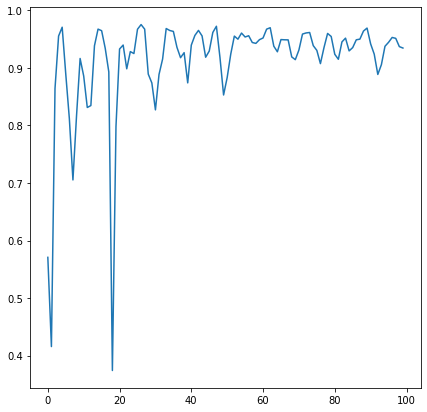

In [111]:
plt.plot(model_history.history["accuracy"])

In [112]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [113]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Pre','Input Post', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [114]:
def show_predictions(test_x_rgb,test_y_gray, num=1):
  count = 0
  for image, mask in zip(test_x_rgb,test_y_gray):
    # print(image.shape,mask.shape)
    pred_mask = unet.predict(image[np.newaxis,:,:,:])
    display([image[:,:,0:1],image[:,:,1:2] ,mask, create_mask(pred_mask)])
    count += 1
    if count>=num:
      break

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


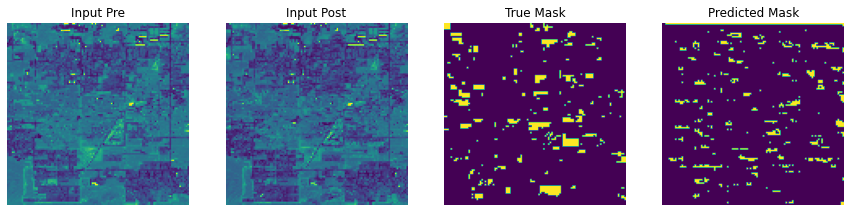

In [115]:
show_predictions(test_x_gray,test_y_gray,)

In [117]:
mkdir saved_model

mkdir: cannot create directory ‘saved_model’: File exists


In [120]:
unet.save('saved_model/unet_model')

INFO:tensorflow:Assets written to: saved_model/unet_model/assets


In [122]:
mkdir weights

In [123]:
unet.save_weights('weights/model_weight')